Gráficos:
~Histograma~, Gráficos de Relación, Categoricos, Matriz, ~Regresión~

In [57]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
conn = sqlite3.connect("music_smaller_10000.db.db")

In [59]:
# listar las tablas de la base de datos
query = "SELECT * FROM playlists"
datos = pd.read_sql_query(query, conn)

# Mostrar cómo queda el archivo
print(datos.head())



   slice  pid  modified_at  num_tracks  num_albums  num_followers  num_edits  \
0  0-999    0   1493424000          52          47              1          6   
1  0-999    1   1506556800          39          23              1          5   
2  0-999    2   1505692800          64          51              1         18   
3  0-999    3   1501027200         126         107              1          4   
4  0-999    4   1401667200          17          16              2          7   

   duration_ms  num_artists  
0     11532414           37  
1     11656470           21  
2     14039958           31  
3     28926058           86  
4      4335282           16  


# **Pregunta 1:**
11. Seleccionar las canciones que duran más de la duración promedio de todas las canciones

**Gráfico:** Histograma

In [119]:
query = """

    SELECT *
    FROM song
    WHERE duration_ms > (SELECT AVG(duration_ms)
    FROM song
    );
"""

In [120]:
datos = pd.read_sql_query(query, conn)
print(datos.head())

                              track_uri  pid  pos  \
0  spotify:track:4SDywo3ykB2PEthjXvo1UP    6    0   
1  spotify:track:1hWQvA6oGVJ2mAVsZ59AaV    6    3   
2  spotify:track:56SkdBKyR2zOkjk6wVFI9s    6    4   
3  spotify:track:6y20BV5L33R8YXM0YuI38N    6    5   
4  spotify:track:6xy6jNeNTYwjnKTDzMyHw2    6    6   

                             artist_name  \
0           Creedence Clearwater Revival   
1  Nathaniel Rateliff & The Night Sweats   
2                                Toadies   
3                Queens of the Stone Age   
4                        The Cranberries   

                              artist_uri            track_name  \
0  spotify:artist:3IYUhFvPQItj6xySrBmZkd  I Put A Spell On You   
1  spotify:artist:02seUFsFQP7TH4hLrTj77o                S.O.B.   
2  spotify:artist:2QMMktUMtwMSwUZATX1cRO        Possum Kingdom   
3  spotify:artist:4pejUc4iciQfgdX6OKulQn          No One Knows   
4  spotify:artist:7t0rwkOPGlDPEhaOcVtOt9                Zombie   

                   

In [122]:
query = """
    SELECT AVG(duration_ms)
    FROM song;
"""

duracionPromSongs = pd.read_sql_query(query, conn)
print(duracionPromSongs)

   AVG(duration_ms)
0      234355.94121


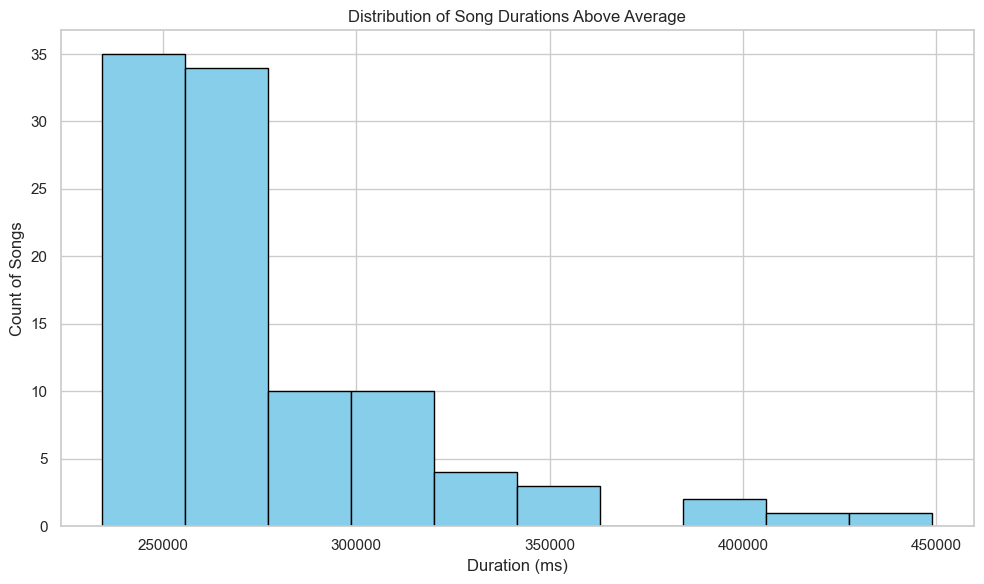

In [123]:
# Histograma: Distribución de la duración de las canciones
df = datos.drop_duplicates(subset='track_uri').head(100)
plt.figure(figsize=(10, 6))
plt.hist(df['duration_ms'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Duration (ms)')
plt.ylabel('Count of Songs')
plt.title('Distribution of Song Durations Above Average')
plt.tight_layout()
plt.show()


*Párrafo explicativo*

Con este gráfico se puede observar la distribución de la duración de las canciones que superan la media de la tabla y que tanto distan de esta media. La duración promedio de la tabla de songs equivale a 234355.94121 ms (3 minutos y 54 segundos). Gracias a esta a la query realizada y al gráfcio podemos afirmar que la mayoría de las canciones que superan la media están muy cerca a esta viendo que que la mayoría de las canciones no superan el valor de 4 minutos y 35 segundos siendo muy extremos las canciones que superan los 7 minutos y medio.

# **Pregunta 2**

1. Top 20 de Playlists mas Recientes -> Utilizar modified at mayor que

**Gráfico:** Regresión

In [71]:
query = """
SELECT *
FROM playlists
ORDER BY modified_at 
LIMIT 20;
"""

In [72]:
datos = pd.read_sql_query(query, conn)
print(datos.head())

         slice    pid  modified_at  num_tracks  num_albums  num_followers  \
0  10000-10999  10845   1310601600           7           7              3   
1    9000-9999   9328   1318204800          39          28              1   
2        0-999    295   1322611200          47          35              2   
3  10000-10999  10568   1323475200         155          62              1   
4    8000-8999   8714   1327017600          39          33              2   

   num_edits  duration_ms  num_artists  
0          2      1312185            7  
1          2      9660432           17  
2          3      9019237           38  
3          3     30222412           47  
4          2      9039560           31  


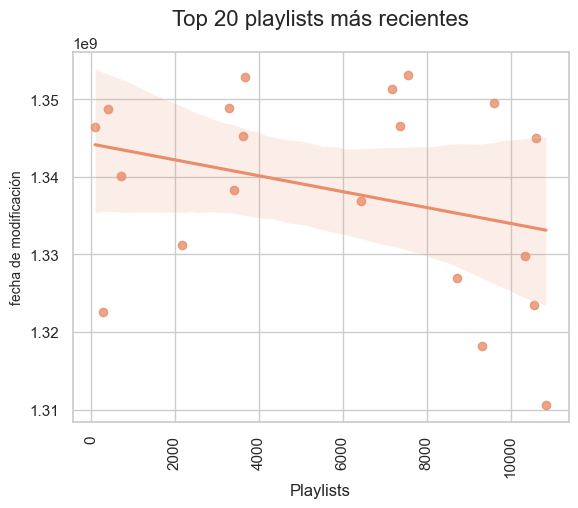

In [85]:
g = sns.regplot(x="pid", y="modified_at", data=datos);
sns.set_theme(style="whitegrid", palette="flare")


# Ajustar el layout
plt.xticks(rotation=90)
g.set_xlabel("Playlists", fontsize=12)
g.set_ylabel("fecha de modificación", fontsize=10)

# Agregar un título general para el FacetGrid
g.set_title("Top 20 playlists más recientes", fontsize=16, y=1.05)



# Mostrar el gráfico
plt.show()

*Párrafo explicativo*

Este gráfico muestra las 20 playlists más recientes ordenadas por su fecha de modificación por medio de una regresión lineal. Se muestra una leve tendencia decreciente frente a las fechas de modificación a medida que los pid de las playlists aumentan. A su vez se evidencia una dispersión considerable en los puntos de datos, indicando que aunque en promedio las fechas de modificación tienden a decrecer con identificadores más altos, hay muchas excepciones. Por ejemplo: dos playlists con identificadores cercanos pueden tener fechas de modificación bastante diferentes. Al final, este gráfico sugiere que las playlists más recientes tienden a tener identificadores más bajos y fechas de modificación más cercanas al presente, pero con una variabilidad considerable en los datos.

# **Pregunta 3**

top 5 albums que más veces aparecen en las playlists

**Gráfico:** categórico

In [125]:
query= """
SELECT 
    album_name, COUNT(pid)
FROM 
    song
GROUP BY 
    album_name
ORDER BY 
    COUNT(pid) DESC
LIMIT 5;

"""

In [126]:
datos = pd.read_sql_query(query, conn)
print(datos.head())

      album_name  COUNT(pid)
0          Views        1663
1         Stoney        1172
2  Greatest Hits        1163
3          DAMN.        1135
4      More Life        1133


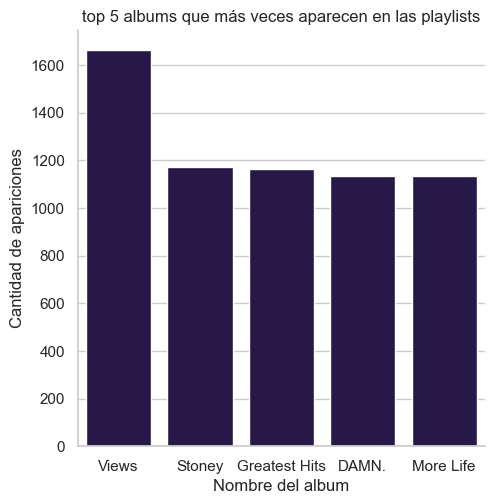

In [128]:

# Crear el gráfico
sns.set_theme(style="whitegrid", palette="magma")
sns.catplot(data=datos, x="album_name", y="COUNT(pid)", kind="bar")

# Agregar título y etiquetas
plt.title('top 5 albums que más veces aparecen en las playlists')
plt.xlabel('Nombre del album')
plt.ylabel('Cantidad de apariciones')
plt.show()


*Párrafo explicativo*

Este gráfico muestra las 20 playlists más recientes ordenadas por su fecha de modificación por medio de una regresión lineal. Se muestra una leve tendencia decreciente frente a las fechas de modificación a medida que los pid de las playlists aumentan. A su vez se evidencia una dispersión considerable en los puntos de datos, indicando que aunque en promedio las fechas de modificación tienden a decrecer con identificadores más altos, hay muchas excepciones. Por ejemplo: dos playlists con identificadores cercanos pueden tener fechas de modificación bastante diferentes. Al final, este gráfico sugiere que las playlists más recientes tienden a tener identificadores más bajos y fechas de modificación más cercanas al presente, pero con una variabilidad considerable en los datos.